In [1]:
%load_ext rpy2.ipython

# [ISL] book -- Chapter 4 Lab: Linear Classification

## Load Libraries

In [2]:
%%R

not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])

if (not.installed("MASS")) install.packages("MASS")
if (not.installed("ISLR")) install.packages("ISLR")
if (not.installed("class")) install.packages("class")

library(MASS)
library(ISLR)
library(class) # has the knn() function


## Stock Market Data

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"
[1] 1250    9
      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 

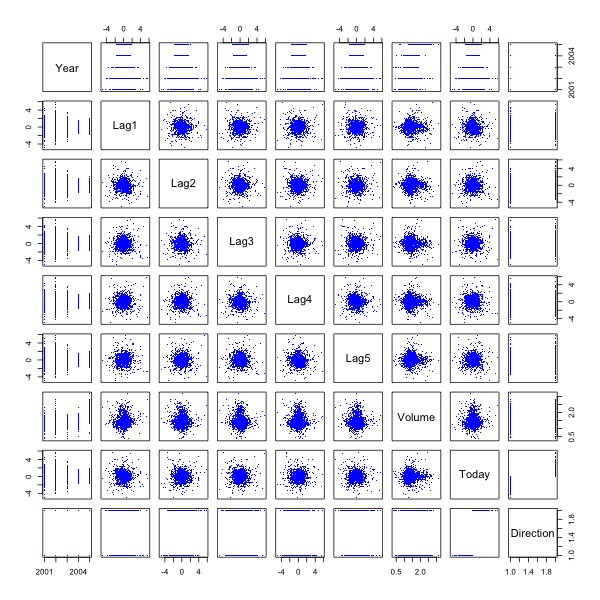

In [3]:
%%R -h 600 -w 600

print( names(Smarket) )
print( dim(Smarket) )
print( summary(Smarket) )
pairs( Smarket, pch=".", col="blue" )

attach(Smarket) # poor style

             Year         Lag1         Lag2         Lag3         Lag4
Year   1.00000000  0.029699649  0.030596422  0.033194581  0.035688718
Lag1   0.02969965  1.000000000 -0.026294328 -0.010803402 -0.002985911
Lag2   0.03059642 -0.026294328  1.000000000 -0.025896670 -0.010853533
Lag3   0.03319458 -0.010803402 -0.025896670  1.000000000 -0.024051036
Lag4   0.03568872 -0.002985911 -0.010853533 -0.024051036  1.000000000
Lag5   0.02978799 -0.005674606 -0.003557949 -0.018808338 -0.027083641
Volume 0.53900647  0.040909908 -0.043383215 -0.041823686 -0.048414246
Today  0.03009523 -0.026155045 -0.010250033 -0.002447647 -0.006899527
               Lag5      Volume        Today
Year    0.029787995  0.53900647  0.030095229
Lag1   -0.005674606  0.04090991 -0.026155045
Lag2   -0.003557949 -0.04338321 -0.010250033
Lag3   -0.018808338 -0.04182369 -0.002447647
Lag4   -0.027083641 -0.04841425 -0.006899527
Lag5    1.000000000 -0.02200231 -0.034860083
Volume -0.022002315  1.00000000  0.014591823
Today  -0.

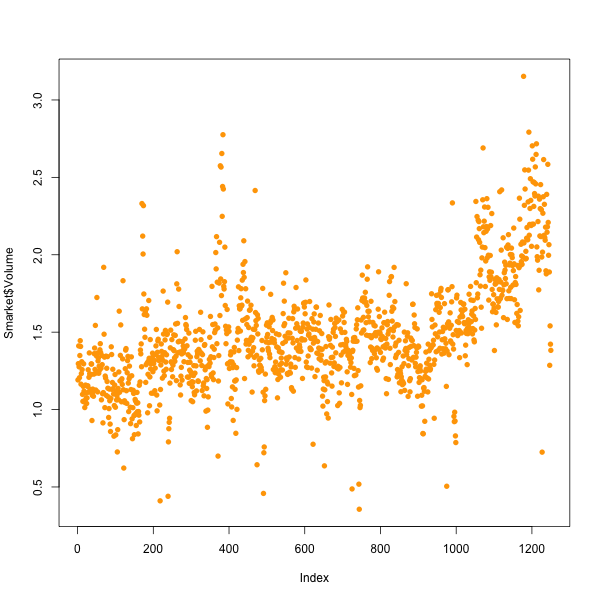

In [4]:
%%R -h 600 -w 600

# print( cor(Smarket) )  ## dies because column 9 is nonnumeric

print( cor(Smarket[,-9]) )

plot(Smarket$Volume, pch=16, col="orange")


## Logistic Regression

In [5]:
%%R -h 600 -w 600

glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
              data = Smarket, family = binomial)

print( summary(glm.fit) )
print( coef(glm.fit) )
print( summary(glm.fit)$coef )
print( summary(glm.fit)$coef[, 4] )


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3

 (Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938

In [6]:
%%R

glm.probs = predict(glm.fit, type = "response")
print( glm.probs[1:10] )
print( contrasts(Smarket$Direction) )

glm.pred = rep("Down", 1250)  # default prediction
glm.pred[glm.probs>.5] = "Up"

print_confusion_matrix = function(T) { cat("\n\nConfusion matrix:\n"); print(T); cat("\n\n") }

print_confusion_matrix( table(glm.pred, Smarket$Direction) )  # confusion table

print( (507+145)/1250 )
print( mean(glm.pred == Direction) )

        1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378 
     Up
Down  0
Up    1


Confusion matrix:
        
glm.pred Down  Up
    Down  145 141
    Up    457 507


[1] 0.5216
[1] 0.5216


In [7]:
%%R

train = (Smarket$Year<2005)
Smarket.2005 = Smarket[ !train, ]   # testing set
print( dim(Smarket.2005) )

Direction.2005 = Smarket$Direction[!train]

glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
              data = Smarket, family = binomial, subset = train)

glm.probs = predict(glm.fit, Smarket.2005, type = "response")

glm.pred = rep("Down", 252)  # default prediction
glm.pred[glm.probs>.5] = "Up"

print_confusion_matrix( table(glm.pred, Direction.2005) )

print( mean(glm.pred == Direction.2005) )
print( mean(glm.pred != Direction.2005) )

[1] 252   9


Confusion matrix:
        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44


[1] 0.4801587
[1] 0.5198413


In [8]:
%%R

glm.fit = glm(Direction ~ Lag1+Lag2, data = Smarket, family = binomial, subset = train)
glm.probs = predict(glm.fit, Smarket.2005, type = "response")

glm.pred = rep("Down", 252)
glm.pred[glm.probs>.5] = "Up"

print_confusion_matrix( table(glm.pred, Direction.2005) )

print( mean(glm.pred == Direction.2005) )
print( 106/(106+76) )
predict(glm.fit, newdata = data.frame(Lag1 = c(1.2, 1.5), Lag2 = c(1.1, -0.8)), type = "response")




Confusion matrix:
        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106


[1] 0.5595238
[1] 0.5824176
        1         2 
0.4791462 0.4960939 


## Linear Discriminant Analysis

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293
[1] "class"     "posterior" "x"        


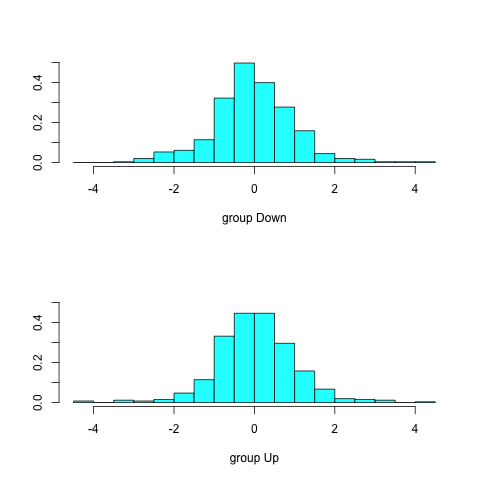

In [9]:
%%R

lda.fit = lda(Direction ~ Lag1+Lag2, data = Smarket, subset = train)

print( lda.fit )
plot(lda.fit)

lda.pred = predict(lda.fit,  Smarket.2005)
print( names(lda.pred) )


In [10]:
%%R

lda.pred = predict(lda.fit,  Smarket.2005)
print( names(lda.pred) )

lda.class = lda.pred$class

print( table(lda.class, Direction.2005) )
print( mean(lda.class == Direction.2005) )
print( sum(lda.pred$posterior[, 1] >= .5) )
print( sum(lda.pred$posterior[, 1] < .5) )
print( lda.pred$posterior[1:20, 1] )
print( lda.class[1:20] )
print( sum(lda.pred$posterior[, 1] > .9) )


[1] "class"     "posterior" "x"        
         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106
[1] 0.5595238
[1] 70
[1] 182
      999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331 
 [1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up
[1] 0


## Quadratic Discriminant Analysis

In [11]:
%%R

qda.fit = qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

print( qda.fit )

qda.class = predict(qda.fit, Smarket.2005)$class

print_confusion_matrix( table(qda.class, Direction.2005) )

print( mean(qda.class == Direction.2005) )


Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544


Confusion matrix:
         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121


[1] 0.5992063


## k-Nearest Neighbors

In [12]:
%%R

train.X = cbind(Smarket$Lag1, Smarket$Lag2)[train, ]
test.X = cbind(Smarket$Lag1, Smarket$Lag2)[!train, ]
train.Direction = Smarket$Direction[train]

set.seed(1)

knn.pred = knn(train.X, test.X, train.Direction, k = 1)
print( table(knn.pred, Direction.2005) )
print( (83+43)/252 )

knn.pred = knn(train.X, test.X, train.Direction, k = 3)
print( table(knn.pred, Direction.2005) )
print( mean(knn.pred == Direction.2005) )


        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83
[1] 0.5
        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87
[1] 0.5357143


## An Application to Caravan Insurance Data

In [13]:
%%R

print( dim(Caravan) )

attach(Caravan)  # poor style

print( summary(Purchase) )
print( 348/5822 )

standardized.X = scale(Caravan[, -86])

print( var(Caravan[, 1]) )
print( var(Caravan[, 2]) )
print( var(standardized.X[, 1]) )
print( var(standardized.X[, 2]) )

[1] 5822   86
  No  Yes 
5474  348 
[1] 0.05977327
[1] 165.0378
[1] 0.1647078
[1] 1
[1] 1


In [14]:
%%R

test = 1:1000
train.X = standardized.X[-test, ]
test.X  = standardized.X[ test, ]

train.Y = Purchase[-test]
test.Y  = Purchase[ test]

print( set.seed(1) )
knn.pred = knn(train.X, test.X, train.Y, k = 1)

print( mean(test.Y != knn.pred) )
print( mean(test.Y != "No") )

print_confusion_matrix( table(knn.pred, test.Y) )
print( 9/(68+9) )

NULL
[1] 0.118
[1] 0.059


Confusion matrix:
        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9


[1] 0.1168831


In [15]:
%%R

knn.pred = knn(train.X, test.X, train.Y, k = 3)

print_confusion_matrix( table(knn.pred, test.Y) )
print( 5/26 )

knn.pred = knn(train.X, test.X, train.Y, k = 5)

print_confusion_matrix( table(knn.pred, test.Y) )
print( 4/15 )



Confusion matrix:
        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5


[1] 0.1923077


Confusion matrix:
        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4


[1] 0.2666667


In [16]:
%%R

glm.fit = glm(Purchase ~ ., data = Caravan, family = binomial, subset = -test)

glm.probs = predict(glm.fit, Caravan[test, ], type = "response")
glm.pred = rep("No", 1000)
glm.pred[glm.probs>.5] = "Yes"

print_confusion_matrix( table(glm.pred, test.Y) )



Confusion matrix:
        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0




In [17]:
%%R

glm.pred = rep("No", 1000)

glm.pred[glm.probs>.25] = "Yes"

print_confusion_matrix( table(glm.pred, test.Y) )
print( 11/(22+11) )



Confusion matrix:
        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11


[1] 0.3333333


In [20]:
%%R

names(Caravan)

 [1] "MOSTYPE"  "MAANTHUI" "MGEMOMV"  "MGEMLEEF" "MOSHOOFD" "MGODRK"  
 [7] "MGODPR"   "MGODOV"   "MGODGE"   "MRELGE"   "MRELSA"   "MRELOV"  
[13] "MFALLEEN" "MFGEKIND" "MFWEKIND" "MOPLHOOG" "MOPLMIDD" "MOPLLAAG"
[19] "MBERHOOG" "MBERZELF" "MBERBOER" "MBERMIDD" "MBERARBG" "MBERARBO"
[25] "MSKA"     "MSKB1"    "MSKB2"    "MSKC"     "MSKD"     "MHHUUR"  
[31] "MHKOOP"   "MAUT1"    "MAUT2"    "MAUT0"    "MZFONDS"  "MZPART"  
[37] "MINKM30"  "MINK3045" "MINK4575" "MINK7512" "MINK123M" "MINKGEM" 
[43] "MKOOPKLA" "PWAPART"  "PWABEDR"  "PWALAND"  "PPERSAUT" "PBESAUT" 
[49] "PMOTSCO"  "PVRAAUT"  "PAANHANG" "PTRACTOR" "PWERKT"   "PBROM"   
[55] "PLEVEN"   "PPERSONG" "PGEZONG"  "PWAOREG"  "PBRAND"   "PZEILPL" 
[61] "PPLEZIER" "PFIETS"   "PINBOED"  "PBYSTAND" "AWAPART"  "AWABEDR" 
[67] "AWALAND"  "APERSAUT" "ABESAUT"  "AMOTSCO"  "AVRAAUT"  "AAANHANG"
[73] "ATRACTOR" "AWERKT"   "ABROM"    "ALEVEN"   "APERSONG" "AGEZONG" 
[79] "AWAOREG"  "ABRAND"   "AZEILPL"  "APLEZIER" "AFIETS"   "AINBOED" 
[85] "